In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [35]:
dataset = pd.read_csv("heart.csv")

In [36]:
type(dataset)

pandas.core.frame.DataFrame

In [37]:
dataset.shape

(918, 12)

In [38]:
dataset.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
764,41,F,NAP,112,268,0,LVH,172,Y,0.0,Up,0
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
564,57,M,ASY,144,270,1,ST,160,Y,2.0,Flat,1
360,62,M,NAP,160,0,0,Normal,72,Y,0.0,Flat,1
137,39,M,ATA,120,241,0,ST,146,N,2.0,Up,0


In [39]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [41]:
info = ["age","1: male, 0: female",
        "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved",
        "exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

Age:			age
Sex:			1: male, 0: female
ChestPainType:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
RestingBP:			resting blood pressure
Cholesterol:			 serum cholestoral in mg/dl
FastingBS:			fasting blood sugar > 120 mg/dl
RestingECG:			resting electrocardiographic results (values 0,1,2)
MaxHR:			 maximum heart rate achieved
ExerciseAngina:			exercise induced angina
Oldpeak:			oldpeak = ST depression induced by exercise relative to rest
ST_Slope:			the slope of the peak exercise ST segment
HeartDisease:			number of major vessels (0-3) colored by flourosopy


In [42]:
dataset["HeartDisease"].describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [43]:
dataset["HeartDisease"].unique()

array([0, 1], dtype=int64)

In [44]:
print(dataset.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease    1.000000
Oldpeak         0.403951
MaxHR           0.400421
Age             0.282039
FastingBS       0.267291
Cholesterol     0.232741
RestingBP       0.107589
Name: HeartDisease, dtype: float64


1    508
0    410
Name: HeartDisease, dtype: int64


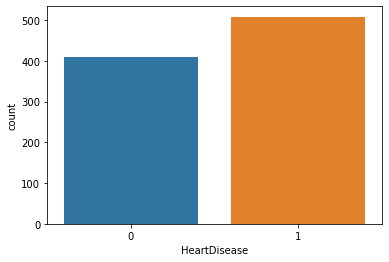

In [45]:
y = dataset["HeartDisease"]

sns.countplot(y)


target_temp = dataset.HeartDisease.value_counts()

print(target_temp)

In [46]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 135.31
Percentage of patience with heart problems: 167.66


In [47]:
dataset["Sex"].unique()

array(['M', 'F'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

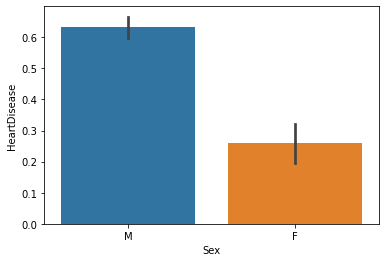

In [48]:
sns.barplot(dataset["Sex"],y)

In [49]:
dataset["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

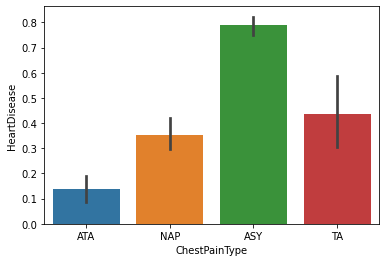

In [50]:
sns.barplot(dataset["ChestPainType"],y)

In [51]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
label_encoder = preprocessing.LabelEncoder() 
dataset['Sex']= label_encoder.fit_transform(dataset['Sex']) 
dataset['ChestPainType']= label_encoder.fit_transform(dataset['ChestPainType']) 
dataset['RestingECG']= label_encoder.fit_transform(dataset['RestingECG']) 
dataset['ExerciseAngina']= label_encoder.fit_transform(dataset['ExerciseAngina']) 
dataset['ST_Slope']= label_encoder.fit_transform(dataset['ST_Slope']) 

In [52]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("HeartDisease",axis=1)
target = dataset["HeartDisease"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [55]:
print(Y_pred_dt.shape)

(184,)


In [56]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.26 %


In [64]:
from sklearn.ensemble import BaggingClassifier

estimators = {
        'DecisionTreeClf' : DecisionTreeClassifier()
    }
for name, estimator in estimators.items():
        bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=50).fit(X_train, Y_train)
        bag_predict = bag_class.predict(X_test)
        print('='*64)
        print('SCORE Bagging with {} : {}'.format(name, accuracy_score(bag_predict, Y_test)))

SCORE Bagging with DecisionTreeClf : 0.8586956521739131
